# matplotlib:
Matplotlib was created by John D. Hunter in 2002 as a tool to enable MATLAB-like plotting capabilities in Python. Hunter, a neurobiologist, developed Matplotlib to facilitate data visualization in his scientific research.

Matplotlib is a comprehensive Python library used for creating static, interactive, and animated visualizations. It provides a wide range of plotting functions and tools for generating high-quality graphics, making it a popular choice for data visualization tasks in fields such as scientific research, data analysis, engineering, finance, and more.

In [1]:
import pandas as pd
import numpy as np

Welcome to my Matplotlib exploration of the Titanic dataset! In this notebook, we'll be diving into the data of the Titanic passengers and visualizing it using Matplotlib. The Titanic dataset gives us information about the passengers' demographics, such as age, gender, class, and survival status. Our main focus here will be on creating various plots to gain insights into the data. Through these visualizations, we aim to uncover patterns, trends, and correlations that can help us understand more about the passengers' experiences aboard the Titanic. So, get ready to embark on a visual journey through this iconic dataset with Matplotlib!

In [3]:
df = pd.read_csv("titanic.csv")
df = df.drop(columns=["Cabin"])
df = df.dropna()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## Import Library

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import style

plt.style.use("seaborn-notebook") allows you to quickly apply a predefined Seaborn style to your Matplotlib plots, enhancing their appearance with minimal effort.

In [5]:
plt.style.use("seaborn-notebook")

## Plots

## 1.) Scater plot

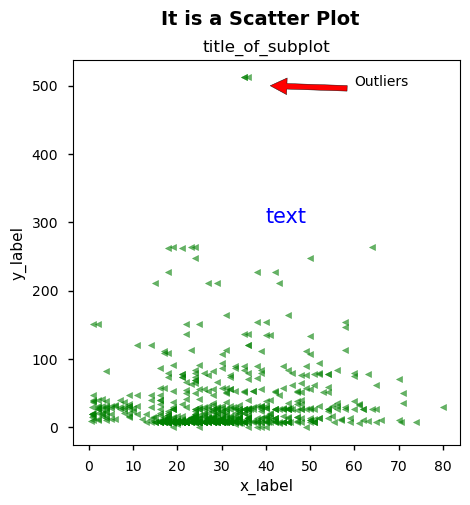

In [6]:
fig1 = plt.figure(figsize=(5,5))

# ax1 = fig.add_subplot(number_of_rows_in_plot, no_of_columns_in_plot, plot_no)
ax1 = fig1.add_subplot(1,1,1)

# s : Change the marker size
# c : change the marker color
# marker:change marker style
# alpha : used to change transperency of marker
ax1.scatter(df["Age"],df["Fare"],s=20,color="green",marker='<',alpha=0.6)

# add Title for figure
fig1.suptitle('It is a Scatter Plot', fontsize=14, fontweight='bold')
ax1.set_title('title_of_subplot')  # add Title for Subplot
ax1.set_xlabel('x_label')     # add x_label
ax1.set_ylabel('y_label')     # add y_label

# apply text with annotation
ax1.annotate('Outliers', xy=(40,500), xytext=(60,500),
     arrowprops=dict(facecolor='Red', shrink=0.05))

# apply text
ax1.text(40, 300, "text",color='Blue', fontsize=15)

plt.show()

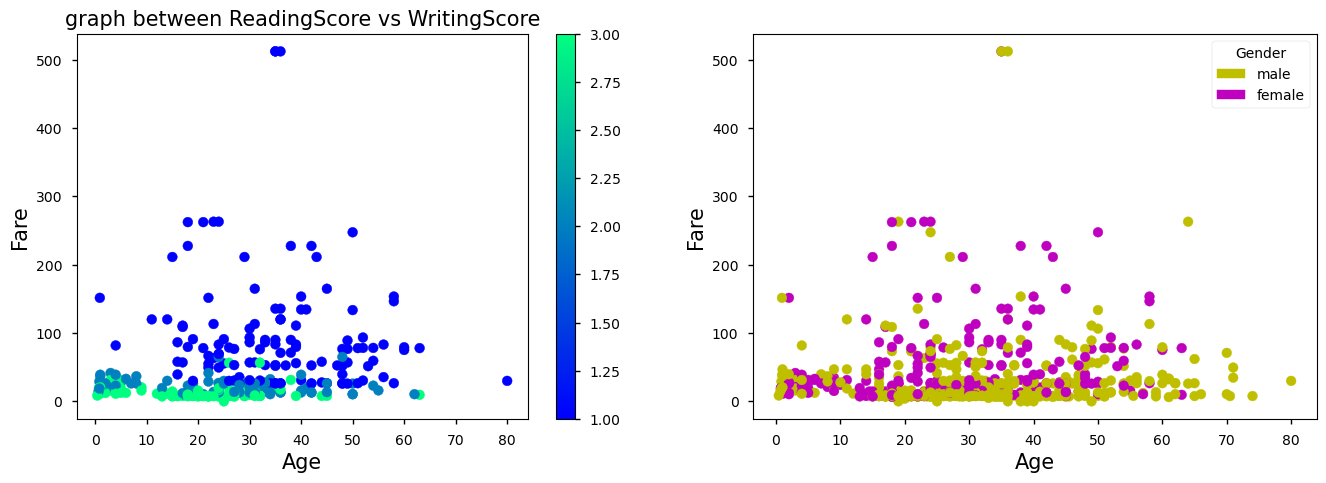

In [33]:
fig2 = plt.figure(figsize=(16,5))
ax1 = fig2.add_subplot(1,2,1)

# cmap is used to change the theme(eg. "jet", "summer")
# jet_r = it is used to rever the color map
# c : takes numerical column
plot1 = ax1.scatter(df["Age"],df["Fare"],c=df["Pclass"],s=df["Survived"]*50,cmap="winter")
ax1.set_title('graph between ReadingScore vs WritingScore',fontsize=15) 
ax1.set_xlabel('Age',fontsize=15)    
ax1.set_ylabel('Fare',fontsize=15)
plt.colorbar(plot1) # add colorbar


# applly color change based on categorical column
ax2 = fig2.add_subplot(1,2,2)
# we have to make a dictionary
# where we define a color for each category 
color = {"male":"y","female":"m"}
ax2.scatter(df["Age"],df["Fare"],c=df["Sex"].map(color))
ax2.set_xlabel('Age',fontsize=15)    
ax2.set_ylabel('Fare',fontsize=15)
# add a custom legend 
red_patch = patches.Patch(color="y",label="male")
blue_patch = patches.Patch(color="m",label="female")
ax2.legend(title="Gender",handles=[red_patch,blue_patch])

plt.show()

## 2.) Lineplot

In [7]:
temp = df.groupby("Embarked")[["Age","Fare","Parch"]].mean()
temp

,Age,Fare,Parch
Embarked,,,
C,30.814769,68.296767,0.415385
Q,28.089286,18.265775,0.392857
S,29.445397,27.476284,0.438628


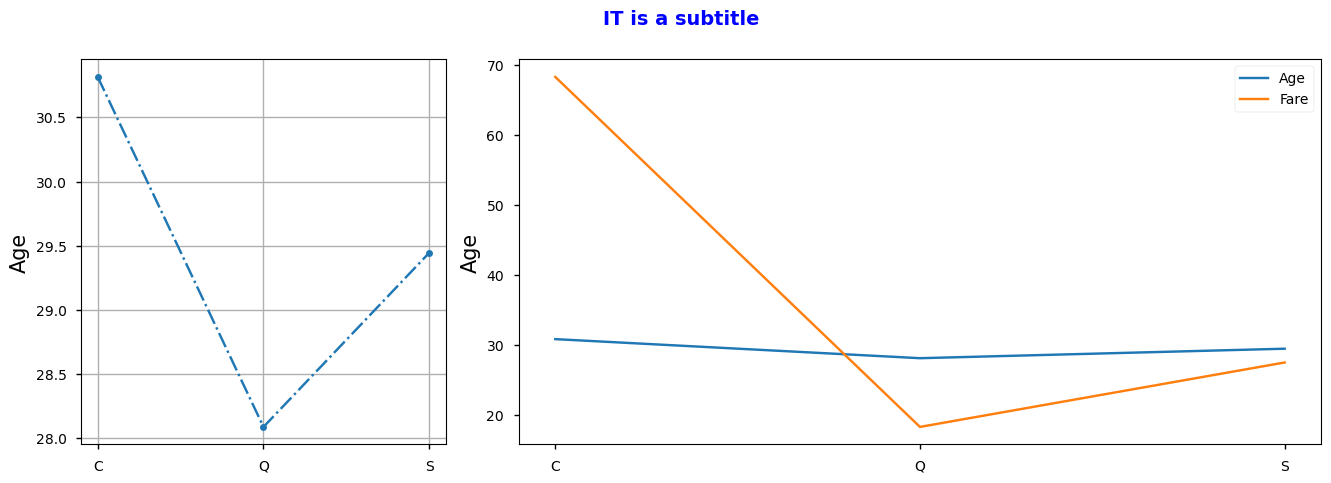

In [8]:
# make a plot between ethinic group and marks
fig3 = plt.figure(figsize=(16,5))
fig3.suptitle('IT is a subtitle', fontsize=14, fontweight='bold',color="Blue")
grid_space = fig3.add_gridspec(1,3) # it is used to change the ratio of subplot

#figure1
ax1 = fig3.add_subplot(grid_space[0,:1])
ax1.set_ylabel('Age',fontsize=15) 
# linestyle: change the style of line(eg. "solid"->'-',"dased"->'--','dashdot'->'-.' etc)
# marker: to add marker
ax1.plot(temp.index,temp["Age"],label="Age",ls="-.", marker='o',markersize=5)
ax1.grid()     # add grid in plot

ax2 = fig3.add_subplot(grid_space[0,1:])
ax2.set_ylabel('Age',fontsize=15) 
ax2.plot(temp.index,temp["Age"],label="Age")
ax2.plot(temp.index,temp["Fare"],label="Fare")
ax2.legend()
plt.show()

## 3.) Bar Plot

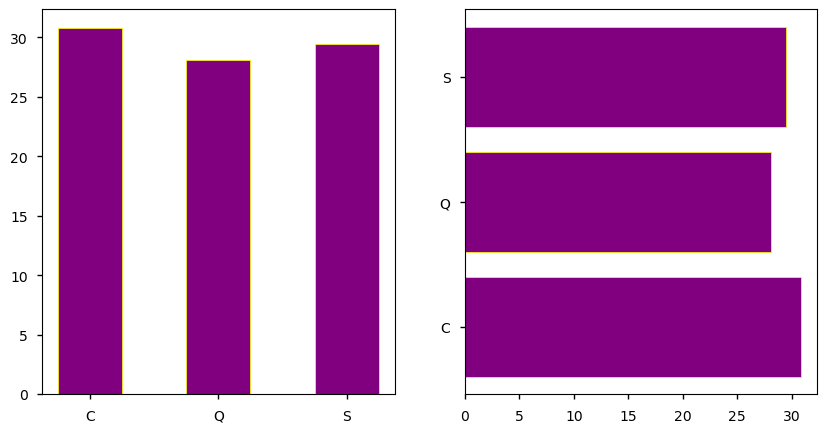

In [9]:
fig4 = plt.figure(figsize=(10,5))
ax1 = fig4.add_subplot(1,2,1)
# width : change width of bars
# color:color of bars
# edgecolor :color of edges of bar
#linewidth : change width of edge of bar
ax1.bar(temp.index,temp["Age"],width=0.5,color="Purple",edgecolor="yellow",linewidth="0.5")


# making horizontal bar chart
ax2 = fig4.add_subplot(1,2,2)
ax2.barh(temp.index,temp["Age"],color="Purple",edgecolor="yellow",linewidth="0.5")
plt.show()

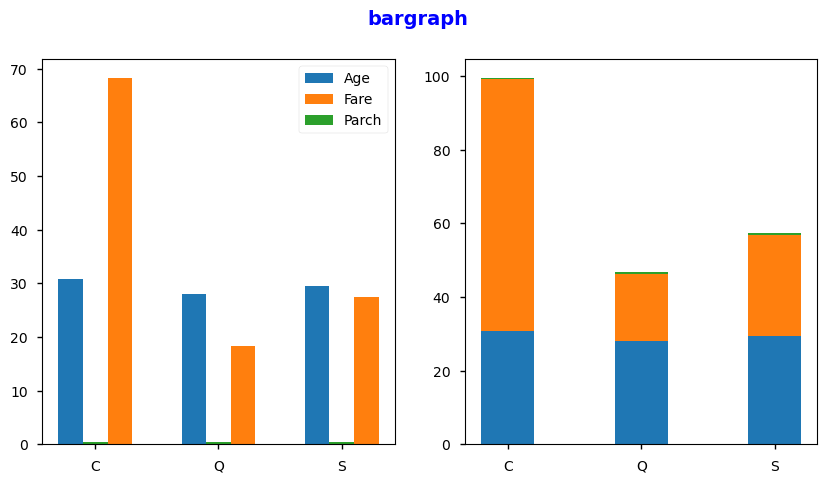

In [10]:
fig5 = plt.figure(figsize=(10,5))
fig5.suptitle('bargraph', fontsize=14, fontweight='bold',color="Blue")

# to make multiple bar chart
ax1 = fig5.add_subplot(1,2,1)
x=temp.index
x_axis = np.arange(len(x))
# we move bar by width of bar
ax1.bar(x_axis-0.2,temp["Age"],width=0.2,label="Age")
ax1.bar(x_axis+0.2,temp["Fare"],width=0.2,label="Fare")
ax1.bar(x_axis,temp["Parch"],width=0.2,label="Parch")
# to change xticks
ax1.set_xticks(x_axis,x)
ax1.legend()

#to make a stacked bar chart
# bottom defines where stacked part start
ax2 = fig5.add_subplot(1,2,2)
ax2.bar(temp.index,temp["Age"],width=0.4,label="Age")
ax2.bar(temp.index,temp["Fare"],width=0.4,label="Fare",bottom=temp["Age"])
ax2.bar(temp.index,temp["Parch"],width=0.4,label="Parch",bottom=temp["Age"]+temp["Fare"])
ax1.legend()
plt.show()

## 4.a) Histogram

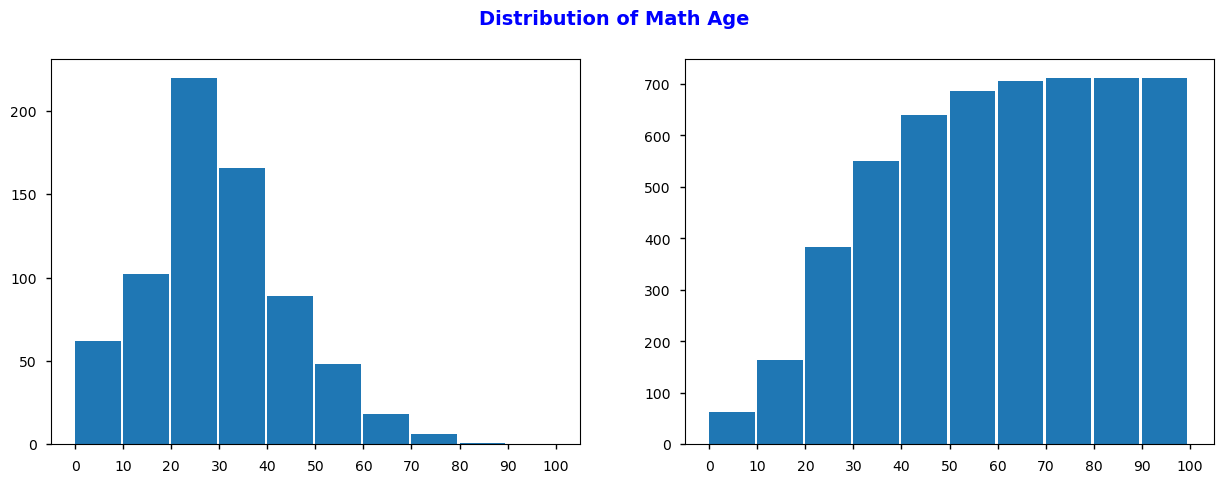

In [11]:
fig6 = plt.figure(figsize=(15,5))
fig6.suptitle('Distribution of Math Age', fontsize=14, fontweight='bold',color="Blue")


ax1 = fig6.add_subplot(1,2,1)
# bins: to defin bins (eg,[10,20,30])
ax1.hist(df["Age"],width=9.5,bins=np.arange(0,101,10))
# change x ticks
ax1.set_xticks(np.arange(0,101,10))

ax2 = fig6.add_subplot(1,2,2)
# commulative sum of counts
ax2.hist(df["Age"],width=9.5,bins=np.arange(0,101,10),cumulative=True)
ax2.set_xticks(np.arange(0,101,10))

plt.show()
# if our data is distributed has some very high value and some very low then we can us log=True

### 4.B) 2D Histogram

<module 'matplotlib.pyplot' from 'C:\\Users\\khush\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

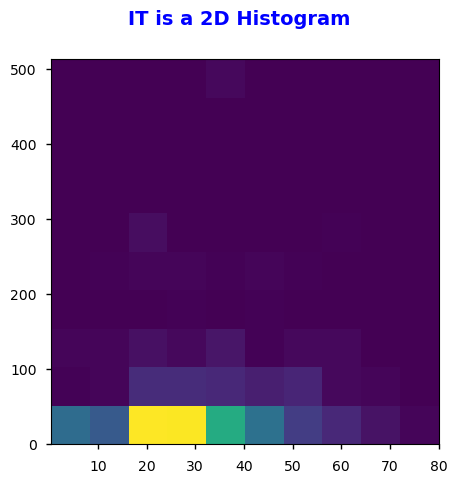

In [12]:
fig9 = plt.figure(figsize=(5,5))
plot2 = fig9.suptitle('IT is a 2D Histogram', fontsize=14, fontweight='bold',color="Blue")
ax1 = fig9.add_subplot(1,1,1)
ax1.hist2d(df["Age"], df["Fare"])
plt

## 5.) Pie chart

In [13]:
# Study of ParentMaritalStatus categorical columns
temp = df["Embarked"].value_counts()
temp

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [14]:
fig = plt.figure(figsize=(10,5))

ax1 = fig6.add_subplot(1,2,1)
# autopct: to label percent of each part
#explode : to extract sigle part of pie chart
# shadow : to make shadow of chart
# radius: change size of pie chart
ax1.pie(temp.values,labels=temp.index,autopct="%0.1f%%", explode=[0,0.1,0],shadow=0.1,radius=1.2)
plt.show()

<Figure size 1000x500 with 0 Axes>

### 6.) Box Plot

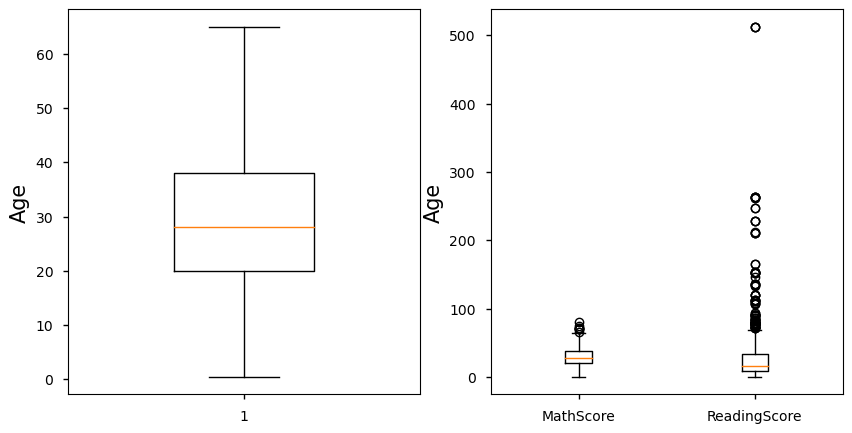

In [15]:
fig7 = plt.figure(figsize=(10,5))
ax1 = fig7.add_subplot(1,2,1)
# to make notch near median(bydefault False)
# vert=False to make horizontal Boxplot
ax1.boxplot(df["Age"],widths=0.4,sym="")
ax1.set_ylabel('Age',fontsize=15)
# ax1.boxplot(df["ReadingScore"])
ax2 = fig7.add_subplot(1,2,2)
ax2.set_ylabel('Age',fontsize=15)
ax2.boxplot([df["Age"],df["Fare"]],positions=[0,1],labels=["MathScore","ReadingScore"])
plt.show()


### 3d Scatter plot

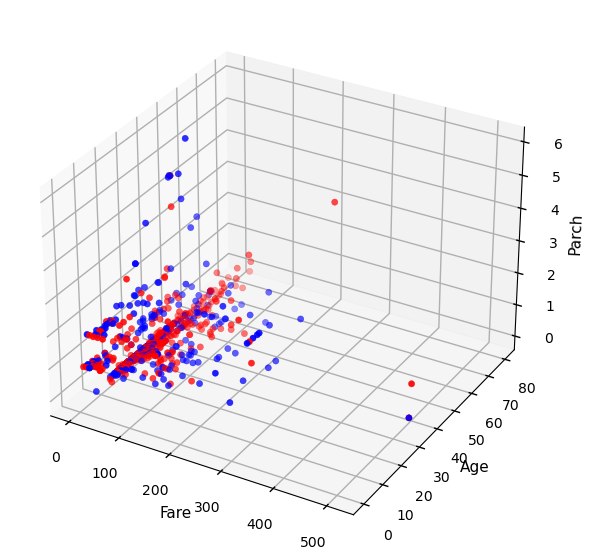

In [18]:
fig8 = plt.figure(figsize=(7,7))
ax = fig8.add_subplot(1,1,1,projection="3d")
color = {"male":"red","female":"Blue"}
ax.scatter3D(df["Fare"],df["Age"],df["Parch"],c=df["Sex"].map(color))
ax.set_xlabel("Fare")
ax.set_ylabel("Age")
ax.set_zlabel("Parch")
plt.show()